<!DOCTYPE html>
<html>
<h3>Описание проекта<a class="tocSkip"></h3>
    
Для интернет-магазина компьютерных игр "Стримчик", который работает по всему миру, нужно выявить закономерности определяющие успешность игры, для этих целей мне доступны данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
    
    
Нужно спланировать компанию на следующий год по данным прошлого года таким образом, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


<i>В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».</i>

<h3>План работы<a class="tocSkip"></h3>

* **Шаг 1. Откроем файл с данными и изучим общую информацию**

* **Шаг 2. Подготовим данные**

* **Шаг 3. Проведем исследовательский анализ данных**

* **Шаг 4. Составим портрет пользователя каждого региона**

* **Шаг 5. Проверим гипотезы**
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 * Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* **Шаг 6. Общий вывод**

**Описание данных**

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы проданных копий)

- EU_sales — продажи в Европе (миллионы проданных копий)

- JP_sales — продажи в Японии (миллионы проданных копий)

- Other_sales — продажи в других странах (миллионы проданных копий)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from scipy import stats as st

**Шаг 1 Откроем файл с данными и изучим общую информацию**

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.info())
display(data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


**Шаг 2 Подготовим данные**

* Заменим названия столбцов (приведем к нижнему регистру)

Решила сделать это лямбда функцией, для того, чтобы не нагружать код

In [3]:
data.rename(columns=lambda x: x.lower(), inplace=True)
display(data.head(1))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Далее преобразуем типы данных, думаю стоит заменить тип данных на int в столбцах: year_of_release, на float: user_score	

In [4]:
display(data['user_score'].unique())
display(data['user_score'].value_counts())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1         2
1.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

'tbd' - аббревиатура, означающая, что оценка будет установлена позднее (предположу, что пользователb еще не закнчил проходить игру), а форма сбора данных предполагала ручной ввод, поэтому мы получили и такие данные
Так как оценка 0 встречается всего 1 раз, а 'tbd' -2424, думаю есть смысл заменить 'tbd' на 0. Далее буду иметь это ввиду


In [5]:
data.replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype('float')

display(data['user_score'].unique())
data.isna().sum()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [6]:
print(
    'Процент отброшенных значений = ',
    round(len(data['year_of_release'].isna())
        / len(data['year_of_release']),2),'%')
data.dropna(subset=['year_of_release'],inplace=True)
data['year_of_release'] = data['year_of_release'].astype('int')

Процент отброшенных значений =  1.0 %


In [7]:
temp = '-01-01'
data['year_of_release'] = data['year_of_release'].apply(lambda x: str(x) + temp)
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y-%m-%d').dt.year

In [8]:
data.dropna(subset=['name'],inplace=True)
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [9]:
data['total'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24


In [10]:
display(len(data)- len(data.drop_duplicates()))
#data.drop_duplicates().reset_index(drop=True)
#явных дублей 0, строка выше оказалась не нужна

0

**Вывод**
 * Заменила названия столбцов (привела к нижнему регистру);
 * Преобразовала данные в нужные типы.
 
 заменила тип данных на int в столбцах: year_of_release, на float: user_score(год не может быть дробным числом, а оценка должна быть численным значением)
 
 * Обработайтала пропуски в столбцах name, year_of_release и genre
 
 В столбце year_of_release были пропущенные значения, что обесценивает такие данные, ведь исследовть их дальше без понимания к какому периоду привязаны оценка, выручки и рейтинг не имеет ценности в конкретном исследовании, также как и без названия игры невозможно адекватно исследовать дальше. 
 
 Пропуском было около 1%,это не нанесет ущерб полнете данных, поэтому я их удалила
 Заполнять пропуски медианным значением в столбцах critic_score и user_score я не стала, т к объем значительный и можно исказить данные таким заполнением
 
 
 В столбце rating заполнить пропуски невозможно

 * Посчитала суммарные продажи во всех регионах и записала их в отдельный столбец total.


**Шаг 3 Проведем исследовательский анализ данных**

In [11]:
tmp = data.groupby('year_of_release')['name'].count()
print(f'минимальное количество выпускаемых в году игр: {tmp.min()}')
print(f'максимальное количество выпускаемых в году игр: {tmp.max()}')
display(tmp)

минимальное количество выпускаемых в году игр: 9
максимальное количество выпускаемых в году игр: 1427


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

За разные периоды выходило неоднородное количество игр, рост с 2002 года и падение после 2011

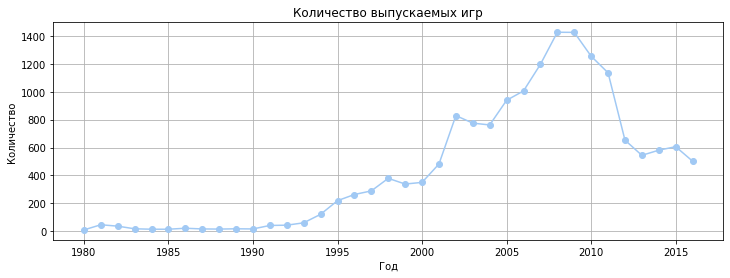

In [12]:
data.pivot_table(index='year_of_release', values='name', aggfunc = 'count').plot(marker='o',
                                                                                 grid=True, figsize=(12, 4), 
                                                                                legend=False, color=sns.color_palette('pastel'))
plt.title('Количество выпускаемых игр')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.show();

In [13]:
data_new = data.query('year_of_release >=2005')

Отсортируем самые популярные по суммарным продажам платформы. Данные будем брать начиная с 2005 года

In [14]:
platform_tmp = data_new.pivot_table(index='platform', values='total', aggfunc = 'sum').sort_values(by='total', 
                                                                                               ascending=False).head(6)
display(platform_tmp)

,total
platform,
X360,961.24
PS3,931.34
Wii,891.18
DS,785.49
PS2,426.46
PS4,314.14


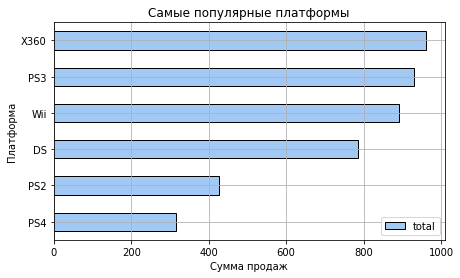

In [15]:
platform_tmp.sort_values(by='total').plot(kind='barh',
                                                legend=True,
                                                grid=True,
                                                color=sns.color_palette('pastel'),
                                                ec='black', figsize=(7, 4))

plt.title('Самые популярные платформы')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show();

In [16]:
data_new.query('platform in @platform_tmp.index').pivot_table(index=['platform', 'year_of_release'], values='total', 
                                                              aggfunc = 'sum').sort_values(by='year_of_release')


,,total
platform,year_of_release,
DS,2005,130.14
X360,2005,8.25
PS2,2005,160.66
Wii,2006,137.15
X360,2006,51.62
PS2,2006,103.42
PS3,2006,20.96
DS,2006,119.81
X360,2007,95.41


Изначально я хотела убрать эту сводную по платформам с самыми высокими суммарными продажами в разрезе всех имеющихся временных периодов, но в ней я заметила то, что подтолкунло меня к мысли о том, что прогноз на 2017 должен быть выстроен на базе нескольких предыдущих лет, а не всей совакупности, т к самые высокие по продажам платформы в 2015 году напрмиер показывают низкие результаты(например PS заменили на более новые модели и в данных есть аж 4 версии PS, PS2, PS3 и PS4)

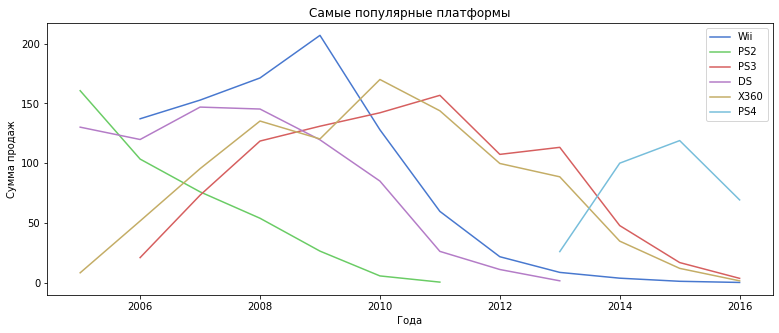

In [17]:

plt.style.use('seaborn-muted')

line_1 = data_new.query('platform =="Wii"').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_2 = data_new.query('platform =="PS2"').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_3 = data_new.query('platform =="PS3"').pivot_table(index='year_of_release', values='total', aggfunc='sum') 
line_4 = data_new.query('platform =="DS"').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_5 = data_new.query('platform =="X360"').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_6 = data_new.query('platform =="PS4"').pivot_table(index='year_of_release', values='total', aggfunc='sum')

fig, ax = plt.subplots(figsize=(13, 5)) 
 
ax.plot(line_1, label = 'Wii') 
ax.plot(line_2, label = 'PS2')
ax.plot(line_3, label = 'PS3')
ax.plot(line_4, label = 'DS')
ax.plot(line_5, label = 'X360')
ax.plot(line_6, label = 'PS4')

ax.legend(loc = 'upper right') 
plt.title('Самые популярные платформы')
plt.xlabel('Года')
plt.ylabel('Сумма продаж')
plt.show();

Я решила посмотреть на самые высокодоходные платформы в разрезе лет на одном графике, визуально можно сказать о том, что характерный срок за который появляются новые и исчезают старые платформы примерно 10 лет. Видно как поколения PS сменяют друг друга)


Для того, чтобы выбрать потенциально прибыльные на 2017 год платформы, лучше рассмотреть период за предыдущие два года, т к рост популярности многих игровых платформ в с 2005 по 2012 может исказить результаты по сумме продаж

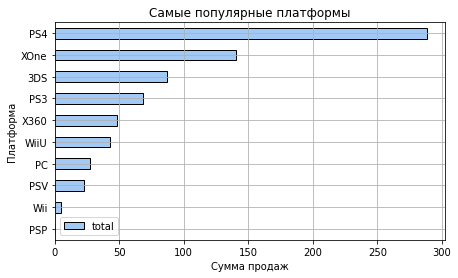

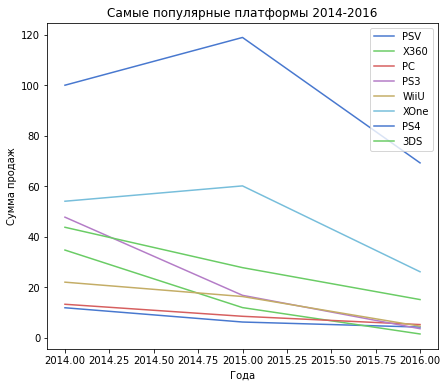

In [18]:
tmp_data = data.query('year_of_release >=2014')
tmp_data.pivot_table(index='platform', values='total', aggfunc = 'sum').sort_values(by='total').plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette('pastel'),
                                                                                                          ec='black', figsize=(7, 4))

plt.title('Самые популярные платформы')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show();

plt.style.use('seaborn-muted')

line_1 = data.query('platform =="PSV" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_2 = data.query('platform =="X360" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_3 = data.query('platform =="PC" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum') 
line_4 = data.query('platform =="PS3" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_5 = data.query('platform =="WiiU" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_6 = data.query('platform =="XOne" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_7 = data.query('platform =="PS4" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')
line_8 = data.query('platform =="3DS" and year_of_release>=2014').pivot_table(index='year_of_release', values='total', aggfunc='sum')


fig, ax = plt.subplots(figsize=(7, 6)) 
 
ax.plot(line_1, label = 'PSV') 
ax.plot(line_2, label = 'X360')
ax.plot(line_3, label = 'PC')
ax.plot(line_4, label = 'PS3')
ax.plot(line_5, label = 'WiiU')
ax.plot(line_6, label = 'XOne')
ax.plot(line_7, label = 'PS4')
ax.plot(line_8, label = '3DS')

ax.legend(loc = 'upper right') 
plt.title('Самые популярные платформы 2014-2016')
plt.xlabel('Года')
plt.ylabel('Сумма продаж')
plt.show();

Не смотря на то, что динамика идет на спад по всем игровым платформам выбранного периода, с отрывом обгоняют конкурентов по сумме продаж PS4, XOne  и 3DS. Я бы делала ставку именно на эти платформы.

Изначально мне хотелось посмотреть на динамику платформ с низкими суммарными продажами на графике, так я бы увидела возможно какую-то пока что малопродающую игровую платформу, но которая набирает популярность и ее линия на графике бы это показала, но убрав из общего графика PS4, XOne  и 3DS, такой динамики ни по одной из оставшихся платформ я не наблюдала

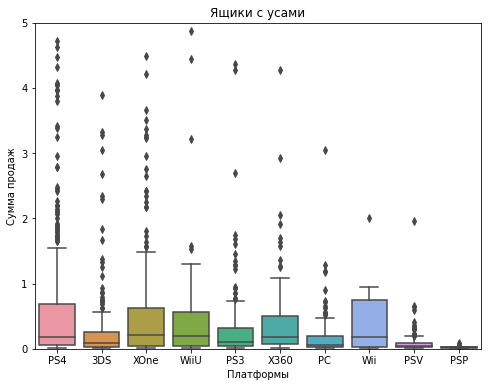

In [19]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,6))
sns.boxplot (x = 'platform', y = 'total', data = tmp_data)
plt.ylim(0,5)
plt.title('Ящики с усами')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж')
plt.show();

In [20]:
print(
    'Процент отброшенных значений = ',
    round(len(data['total'])/len(data['total'][data['total']<15]),2),'%') 


Процент отброшенных значений =  1.0 %


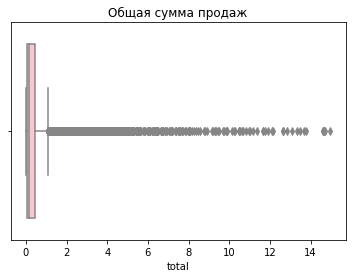

In [21]:
data = data[data['total']<15]
sns.boxplot(data=data, x='total', color='pink');
plt.title('Общая сумма продаж');

В разрезе всех годов из датасета по продажам лидируют WiiU, PS4, XOne и X360. Также заметила значительный выброс в данных PS4, далее буду это учитывать

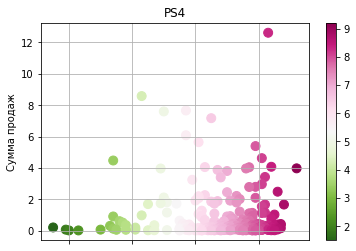

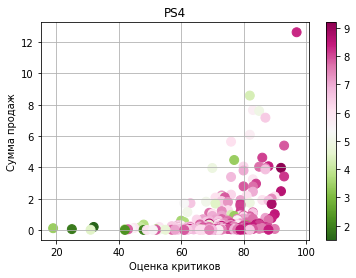

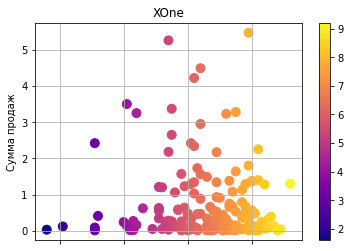

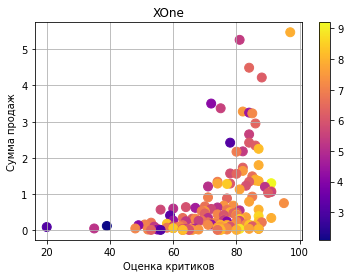

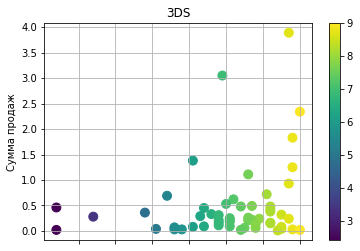

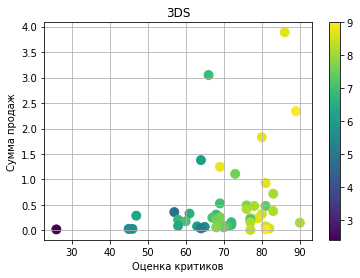

In [22]:

tmp_data.query('platform =="PS4"').plot.scatter(x='user_score', y='total', s=80, c=tmp_data.query('platform =="PS4"').user_score,
                                            cmap='PiYG_r',
                                            figsize=(6, 4),
                                            grid=True)

plt.title('PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
tmp_data.query('platform =="PS4"').plot.scatter(x='critic_score', y='total', s=80, c=tmp_data.query('platform =="PS4"').user_score,
                                            cmap='PiYG_r',
                                            figsize=(6, 4),
                                            sharex=False, grid=True)

plt.title('PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.show();



tmp_data.query('platform =="XOne"').plot.scatter(x='user_score', y='total', s=80, c=tmp_data.query('platform =="XOne"').user_score,
                                            cmap='plasma',
                                            figsize=(6, 4),
                                            grid=True)

plt.title('XOne')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
tmp_data.query('platform =="XOne"').plot.scatter(x='critic_score', y='total', s=80, c=tmp_data.query('platform =="XOne"').user_score,
                                            cmap='plasma',
                                            figsize=(6, 4),
                                            sharex=False, grid=True)

plt.title('XOne')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.show();


tmp_data.query('platform =="3DS"').plot.scatter(x='user_score', y='total', s=80, c=tmp_data.query('platform =="3DS"').user_score,
                                            cmap='viridis',
                                            figsize=(6, 4),
                                            grid=True)

plt.title('3DS')
plt.xlabel('Оценка пользователей')
plt.ylabel('Сумма продаж')
tmp_data.query('platform =="3DS"').plot.scatter(x='critic_score', y='total', s=80, c=tmp_data.query('platform =="3DS"').user_score,
                                            cmap='viridis',
                                            figsize=(6, 4),
                                            sharex=False, grid=True)

plt.title('3DS')
plt.xlabel('Оценка критиков')
plt.ylabel('Сумма продаж')
plt.show();

In [23]:
corr = tmp_data[['critic_score', 'user_score', 'total']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,total
critic_score,1.000000,0.504460,0.328105
user_score,0.504460,1.000000,-0.013070
total,0.328105,-0.013070,1.000000


По диаграммам рассеяния можно сказать, что чем выше оценка как пользователей, так и критиков, тем больше сумма продаж и наоборот. Рассматривая три наиболее перспективные для 2017 года платформы, мы видим примерно похожую ситуацию у всех выбранных платформ.

По значению коэффициента корреляции - связь слабая (в оценках критиков близка к умеренной)

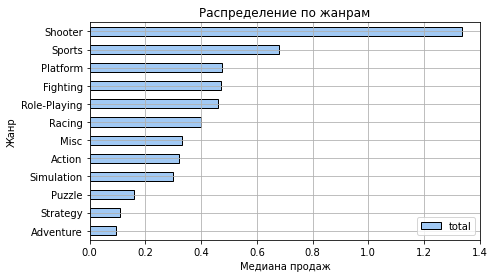

In [24]:
tmp_data.pivot_table(index='genre', values='total', aggfunc = 'mean').sort_values(by='total').plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette('pastel'),
                                                                                                          ec='black', figsize=(7, 4))

plt.title('Распределение по жанрам')
plt.xlabel('Медиана продаж')
plt.ylabel('Жанр')
plt.show();

**Вывод**
 * Посмотрела сколько игр выпускалось в разные годы,с 1980 по 2016 выходило неоднородное количество игр, рост произошел с 2002 года и падение после 2011
 
 * Выбрала платформы с наибольшими суммарными продажами и построила распределение по годам (выделила 6 платформ). Характерный срок за который появляются и исчезают платформы это примерно 10 лет. 
 

 * Не смотря на то, что динамика идет на спад по всем игровым платформам с 2011 года, с отрывом обгоняют конкурентов по сумме продаж на 2014-2016 годы - PS4, XOne и 3DS. Я бы делала ставку именно на эти платформы.

 

 * Построила график «ящик с усами» по глобальным продажам игр в разбивке по платформам. В разрезе всех годов по продажам лидируют WiiU, PS4, XOne и X360. Также заметила значительный выброс в данных PS4, избавилась от экстремальных значений.


 * Посмотрела как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построила диаграмму рассеяния для трех наиболее прибыльных платформ и посчитала корреляцию между отзывами и продажами.По диаграмме рассеяния можно сказать, что чем выше оценка, тем больше сумма продаж и наоборот.По значению коэффициента корреляции - связь слабая (в оценках критиков близка к умеренной) . 


 * Посмотрела на общее распределение игр по жанрам. Наиболее популярны игры жанров экшн, спорт, платформенные и драки. Наименее популярны игры,таких жанров как: симуляции, приключения, пазлы и стратегии.

<div class="alert alert-success">
<b>Комментарий с комплиментом ревьюера:</b> 

Отличный вывод.
    
</div>


**Шаг 4**

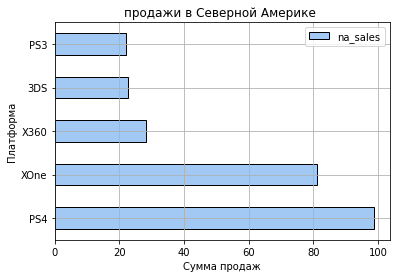

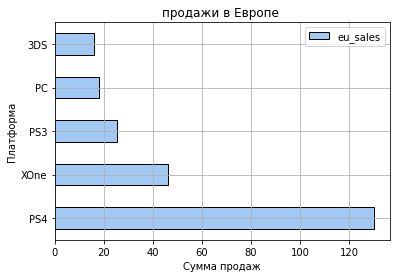

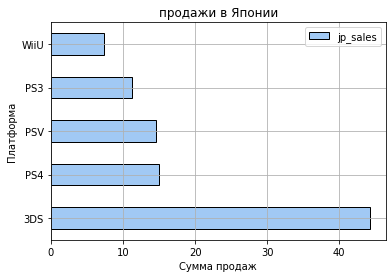

In [25]:
tmp_data.pivot_table(index='platform', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette('pastel'),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Северной Америке ')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')


tmp_data.pivot_table(index='platform', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette('pastel'),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Европе ')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')


tmp_data.pivot_table(index='platform', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette('pastel'),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Японии')
plt.xlabel('Сумма продаж')
plt.ylabel('Платформа')
plt.show();

Составив распределения по сумме продаж для каждого региона, можно сказать о том, что самыми популярными платформами в Северной Америке являются (со значительным преимущетсвом) XOne и PS4, а также X360, 3DS и PS3

Похожие платформы популярны в Европе, лидируют PS4 и XOne

В Японии распределение по платформам выглядит иначе, самая высокая по продпжпм платформа - 3DS, далее PS4 и PSV, затем PS3 и WiiU

Также можно сказать о том, что основными покупателями приходятся пользователи из Северной Америки и Европы (более 80 млн проданных копий и более 120 соответственно)

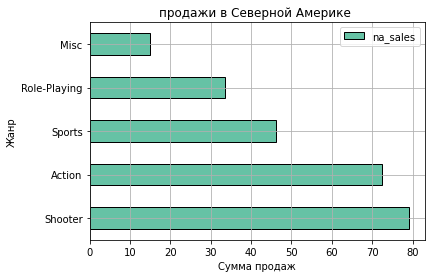

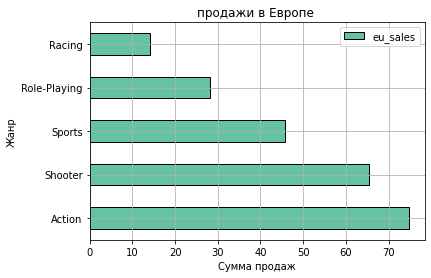

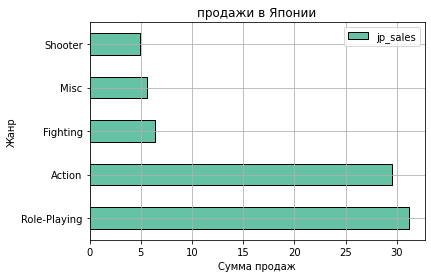

In [26]:
tmp_data.pivot_table(index='genre', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette("Set2"),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Северной Америке ')
plt.xlabel('Сумма продаж')
plt.ylabel('Жанр')


tmp_data.pivot_table(index='genre', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette("Set2"),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Европе ')
plt.xlabel('Сумма продаж')
plt.ylabel('Жанр')


tmp_data.pivot_table(index='genre', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette("Set2"),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Японии')
plt.xlabel('Сумма продаж')
plt.ylabel('Жанр')
plt.show();

Составив распределения по сумме продаж для каждого региона, можно сказать о том,
что самыми популярными жанрами в Северной Америке и Европе являются экшн, спорт и шутеры. В обоих случаях лидируют игры жанра экшн.


В Японии распределение по жанрам выглядит иначе, самый популярный - ролевые игры, только потом экшн, а спорт вообще не попал в топ 5

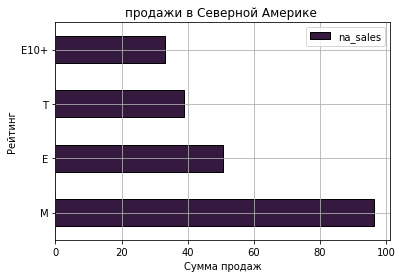

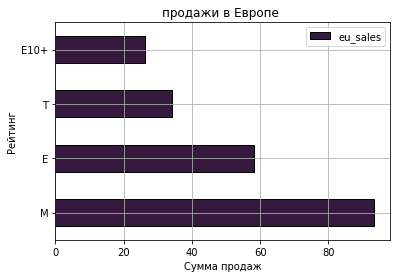

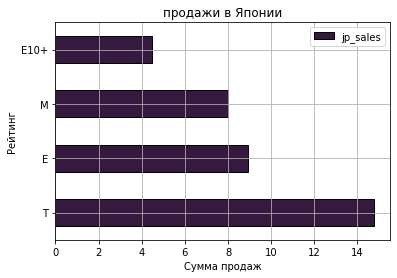

In [27]:
tmp_data.pivot_table(index='rating', values='na_sales', aggfunc = 'sum').sort_values(by='na_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette("rocket"),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Северной Америке ')
plt.xlabel('Сумма продаж')
plt.ylabel('Рейтинг')


tmp_data.pivot_table(index='rating', values='eu_sales', aggfunc = 'sum').sort_values(by='eu_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette("rocket"),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Европе ')
plt.xlabel('Сумма продаж')
plt.ylabel('Рейтинг')


tmp_data.pivot_table(index='rating', values='jp_sales', aggfunc = 'sum').sort_values(by='jp_sales',ascending=False).head(5).plot(kind='barh',
                                                                                                          legend=True,
                                                                                                          grid=True,
                                                                                                          color=sns.color_palette("rocket"),
                                                                                                          ec='black', figsize=(6, 4))

plt.title('продажи в Японии')
plt.xlabel('Сумма продаж')
plt.ylabel('Рейтинг')
plt.show();

Зависимость от рейтинга отслеживается во всех трех регионах. 

Наиболее популярны игры с рейтингом "17+"(в Европе и Северной Америке спрос на них выше, японцы больше предпочитают игры "для подростков"). Также во всех трех наблюдаемых группах популярны игры с рейтингом "для всех"

**Шаг 5**

Проверю гипотезу

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

h0 cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

h1 cредние пользовательские рейтинги платформ Xbox One и PC не одинаковые

In [28]:
xbox_one_ratings = tmp_data[tmp_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = tmp_data[tmp_data['platform'] == 'PC']['user_score'].dropna()

results = st.ttest_ind(xbox_one_ratings, pc_ratings, alternative='two-sided')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу (h0): Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не отвергаем нулевую гипотезу (h0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.")

0.10450507919348415
Не отвергаем нулевую гипотезу (h0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.


Пришлось удалить пропущенные значения в user_score. Потому что значение "nan" появляется из-за наличия пропущенных значений в переменных xbox_one_ratings и pc_ratings

Проверю гипотезу

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

h0 cредние пользовательские рейтинги жанров Action и Sports одинаковые

h1 cредние пользовательские рейтинги жанров Action и Sports разные

In [29]:
action_ratings = tmp_data[tmp_data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = tmp_data[tmp_data['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(action_ratings, sports_ratings, alternative='two-sided')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу (h0): Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу (h0): Средние пользовательские рейтинги жанров Action и Sports одинаковы.")

2.8711147985105864e-19
Отвергаем нулевую гипотезу (h0): Средние пользовательские рейтинги жанров Action и Sports различаются.


**Шаг 6 Вывод**

Было произведено преобразование данных для удобства использования. Названия столбцов были приведены к нижнему регистру, а типы данных в столбцах year_of_release и user_score были изменены на int и float соответственно.

Пропуски в столбцах name, year_of_release и genre были обработаны. Важно отметить, что пропуски в столбце year_of_release особенно негативно сказываются на качестве данных, так как данная информация необходима для дальнейшего исследования. В связи с этим, строки с пропущенными значениями были удалены из датасета.

Были рассчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец под названием "total". Это позволило получить более полную информацию о доходности каждой игры.

Было проанализировано количество выпущенных игр в разные годы. С 1980 по 2016 год неоднородно меняется количество выпускаемых игр, причем наибольший рост наблюдается после 2002 года. Однако, после 2011 года наблюдается снижение выпуска игр.

На основе анализа суммарных продаж выбраны шесть наиболее прибыльных игровых платформ. Построены графики распределения продаж по годам для этих платформ. Важно отметить, что характерный срок существования платформы составляет примерно 10 лет. Также было выяснено, что несмотря на общий тренд спада продаж после 2011 года, некоторые платформы (PS4, XOne и 3DS) продолжают обгонять конкурентов и показывают прибыльный результат в 2014-2016 годах.

Построен "ящик с усами" для глобальных продаж игр в разбивке по платформам. Среди всех лет рассматриваемого периода (1980-2016) наибольшие продажи имели WiiU, PS4, XOne и X360. Было также обнаружено наличие выбросов в данных для платформы PS4, поэтому было принято решение исключить экстремальные значения.

Было исследовано влияние оценок пользователей и критиков на продажи игр. Построена диаграмма рассеяния и рассчитан коэффициент корреляции. Полученные результаты позволяют сделать вывод о том, что существует слабая связь между оценками и продажами (оценки критиков имеют умеренную связь). То есть, чем выше оценка, тем больше сумма продаж, и наоборот.

**Таким образом, проведенный анализ позволяет сделать вывод, что для достижения успеха на рынке видеоигр важным фактором являются высокие оценки от пользователей и критиков, а также выбор платформ, которые продолжают показывать прибыльные результаты**

Самыми популярными жанрами игр являются экшн, спорт, шутеры и ролевые игры, а наименее популярными - симуляции, приключения, пазлы и стратегии.

В Северной Америке и Европе наиболее популярными платформами являются XOne и PS4, а также X360, 3DS и PS3. В Японии же основными платформами являются 3DS, далее PS4 и PSV, затем PS3 и WiiU. Это указывает на разные предпочтения в различных регионах.

Самые активные покупатели находятся в Северной Америке и Европе, где было продано более 80 миллионов копий игр в каждом регионе.

В Северной Америке и Европе самыми популярными жанрами являются экшн, спорт и шутеры. В Японии же самый популярный жанр - ролевые игры, а затем идут экшн и драки.

Отзывы пользователей не различаются в зависимости от платформы. Средние пользовательские рейтинги платформ Xbox One и PC не различаются.

Отзывы пользователей различаются в зависимости от жанра. Средние пользовательские рейтинги жанров Action и Sports значимо различаются.

**Таким образом, можно сделать вывод, что предпочтения игроков, платформы и жанры, могут сильно различаться в зависимости от региона, а также у пользователей есть различные предпочтения в отношении платформ и жанров игр**

<img src = "https://media.tenor.com/2aSuT7p_a_UAAAAi/peachcat-cat.gif" width=180>